# Import Library & Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from scipy import stats
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
warnings.filterwarnings("ignore")

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [3]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset --force
!unzip "/content/diabetes-prediction-dataset.zip" -d "/content/diabetes-prediction-dataset"

df = pd.read_csv('/content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.head()

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 26.7MB/s]
Archive:  /content/diabetes-prediction-dataset.zip
replace /content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv  


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
def build_svc(X_train, y_train):
    model = SVC()
    return model

def build_logistic_regression(X_train, y_train):
    model = LogisticRegression()
    return model

def build_neural_network(X_train, y_train, layers, activation='relu', model_name='Unnamed Model'):
    model = Sequential()
    model.add(Dense(layers[0], input_dim=X_train.shape[1], activation=activation))
    for neurons in layers[1:]:
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
    model.summary()
    start_time = time.time()
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Model Name: {model_name}\n")
    print(f"Elapsed Time: {elapsed_time} seconds\n")
    return model

def build_random_forest(X_train, y_train):
    model = RandomForestClassifier()
    return model

def evaluation(model, X_test, y_test, is_nn=False):
    if is_nn:
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Drop atribut Unnamed:0 karena merupakan sebuah user id yang bersifat unique dan tidak menjadi parameter yang digunakan untuk prediksi

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Missing data

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Preprocessing

In [8]:
df = df.drop_duplicates()
df = df[df['gender'].isin(['Female', 'Male'])]

In [9]:
df.groupby('diabetes').count()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,87646,87646,87646,87646,87646,87646,87646,87646
1,8482,8482,8482,8482,8482,8482,8482,8482


In [10]:
df.groupby('gender').count()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,,
Female,56161,56161,56161,56161,56161,56161,56161,56161
Male,39967,39967,39967,39967,39967,39967,39967,39967


In [11]:
df.groupby('smoking_history').count()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
smoking_history,,,,,,,,
No Info,32881,32881,32881,32881,32881,32881,32881,32881
current,9197,9197,9197,9197,9197,9197,9197,9197
ever,3997,3997,3997,3997,3997,3997,3997,3997
former,9299,9299,9299,9299,9299,9299,9299,9299
never,34395,34395,34395,34395,34395,34395,34395,34395
not current,6359,6359,6359,6359,6359,6359,6359,6359


In [12]:
df.gender.replace({'Female': 0, 'Male': 1}, inplace=True)
df.smoking_history.replace({'never': 0, 'ever': 1, 'former':1, 'not current':1, 'current':2, 'No Info':2}, inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,2,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,2,24.60,4.8,145,0
99996,0,2.0,0,0,2,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


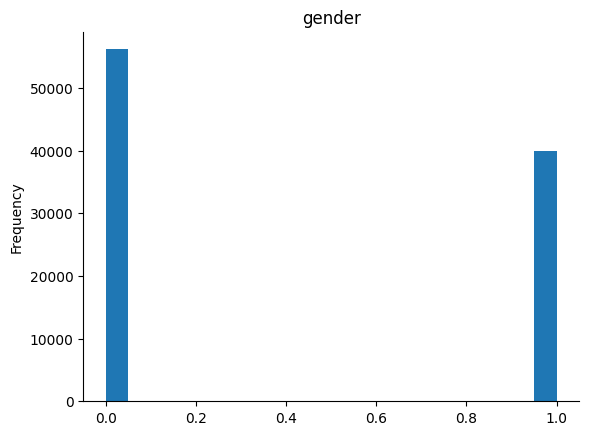

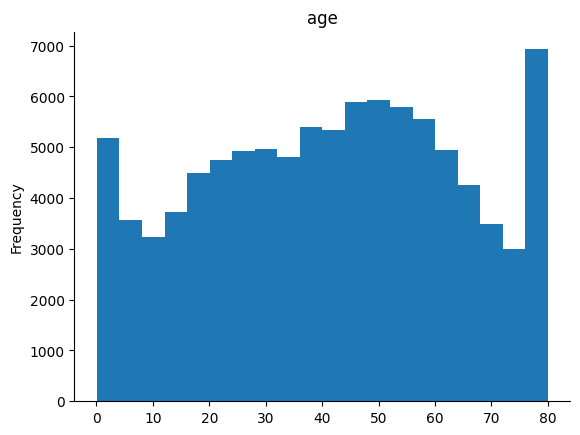

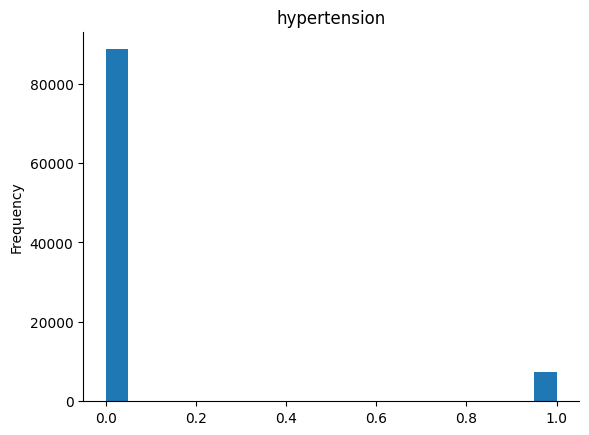

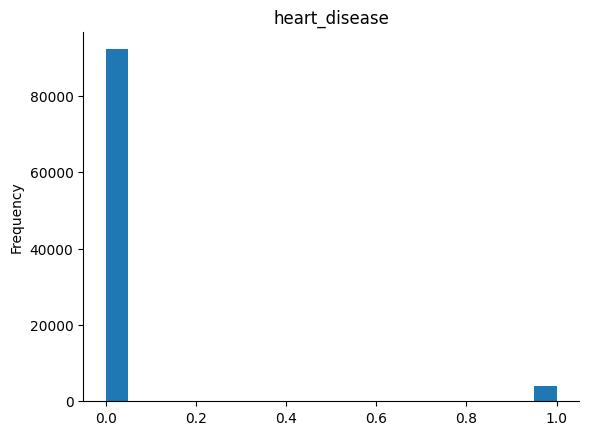

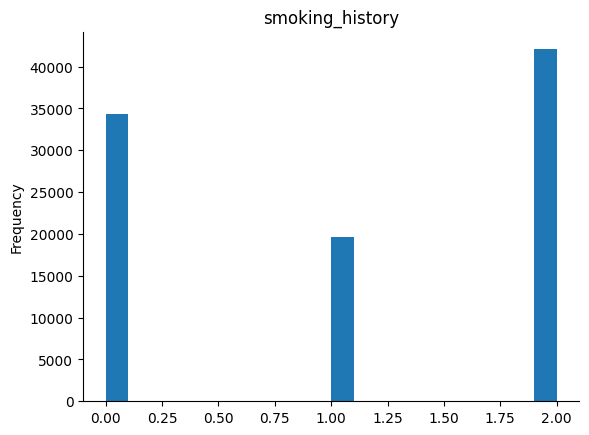

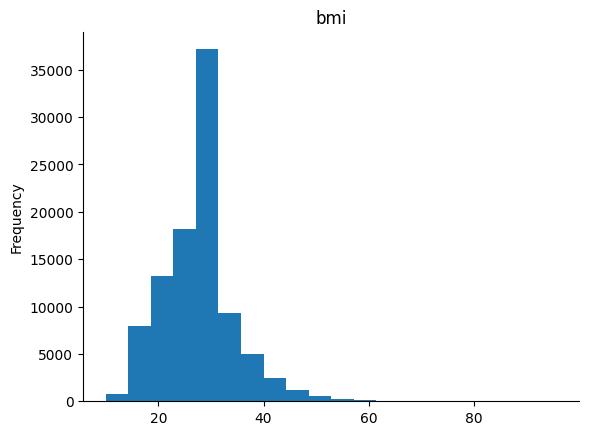

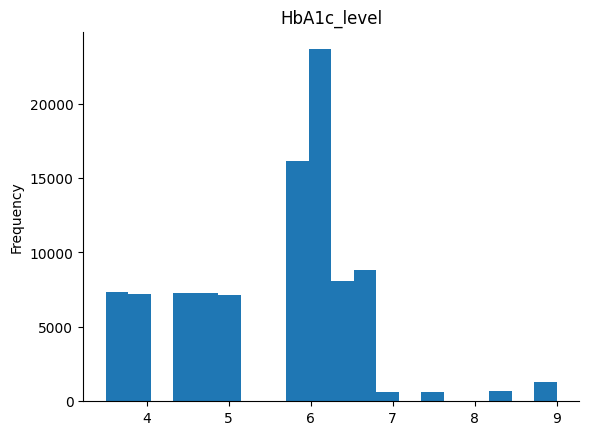

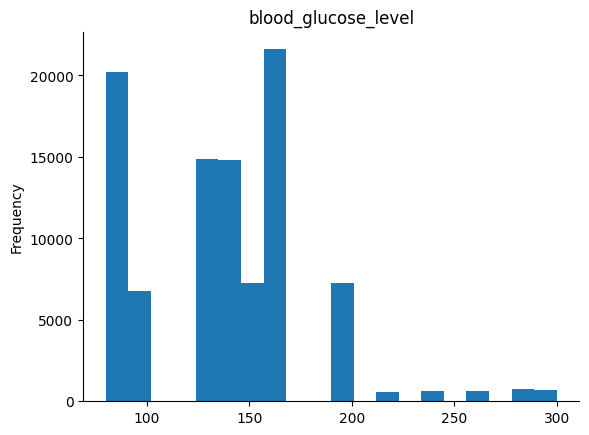

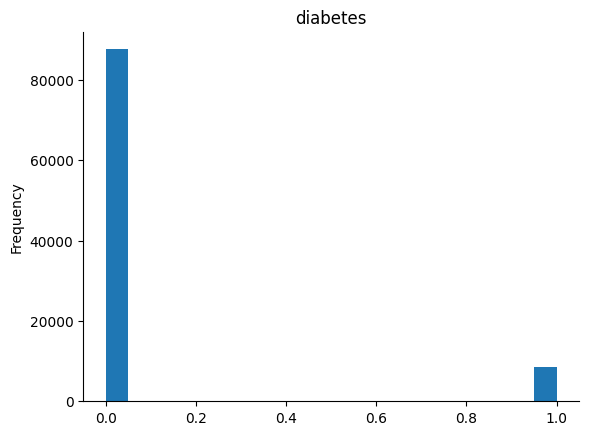

In [13]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure()
        df[column].plot(kind='hist', bins=20, title=column)
        plt.gca().spines[['top', 'right']].set_visible(False)
        plt.show()
    else:
        print(f"Skipping column {column} because it contains non-numeric data.")


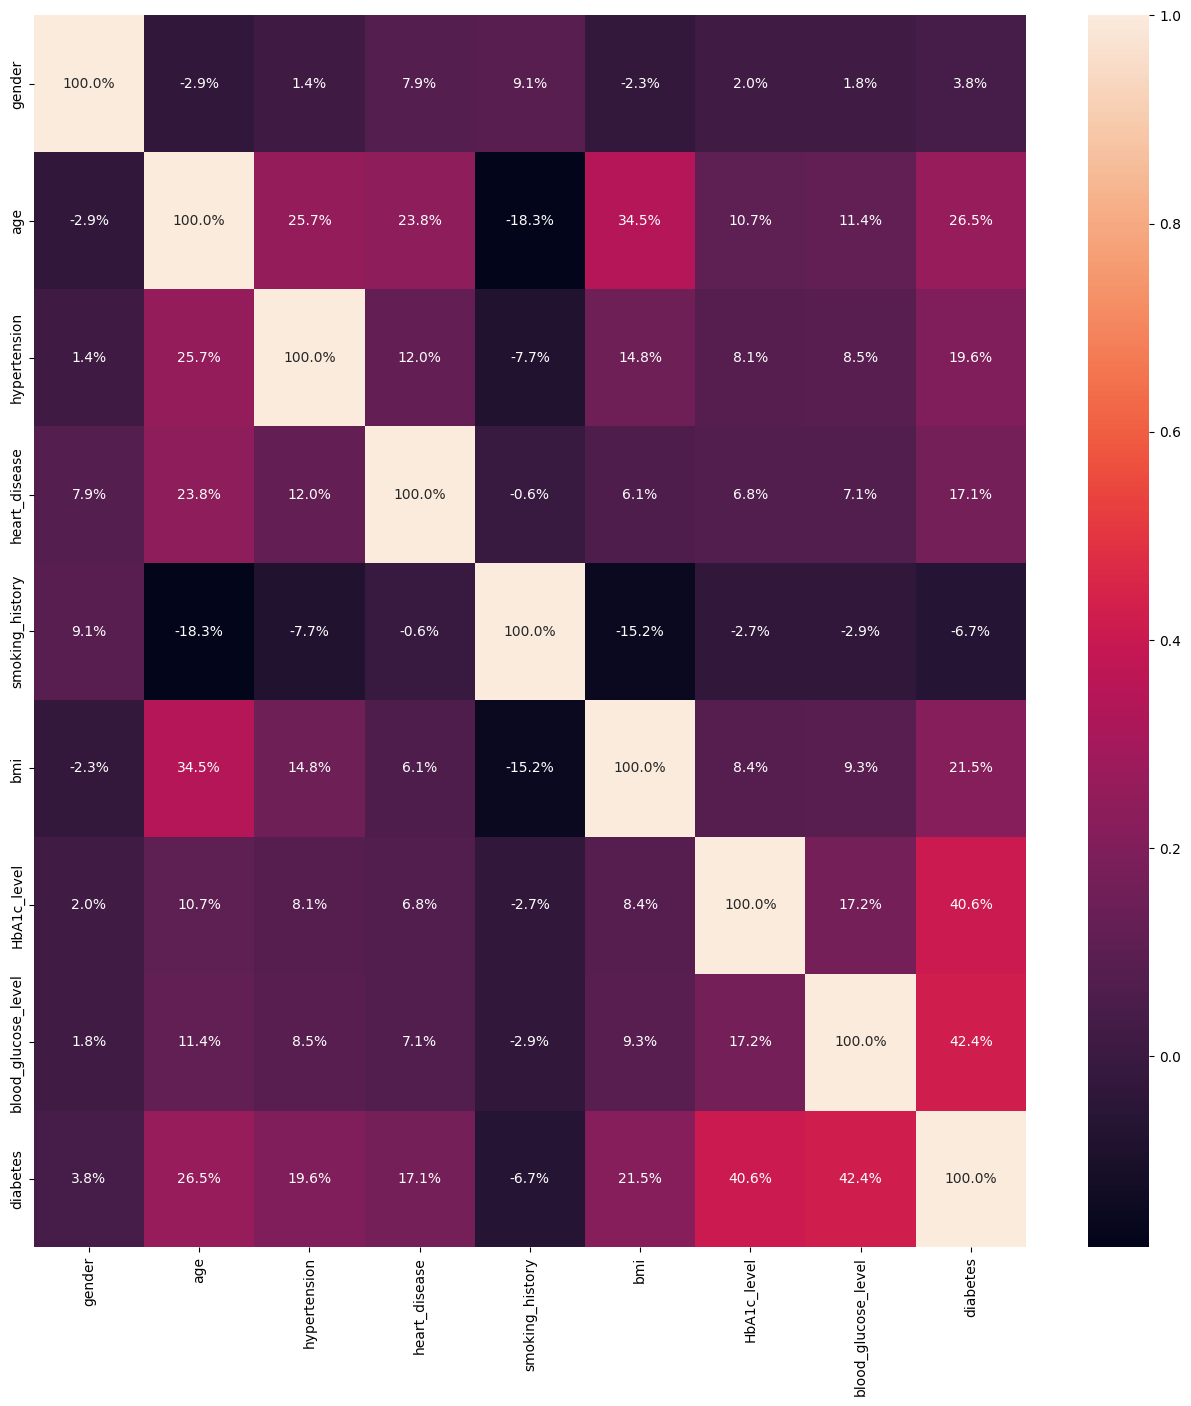

In [14]:
corr = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, fmt=".1%")

plt.show()

In [22]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,0.415769,41.796617,0.077615,0.040810,1.079925,27.321450,5.532633,138.218001,0.088237
std,0.492857,22.463329,0.267567,0.197851,0.888343,6.767811,1.073225,40.911190,0.283640
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,2.000000,29.860000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


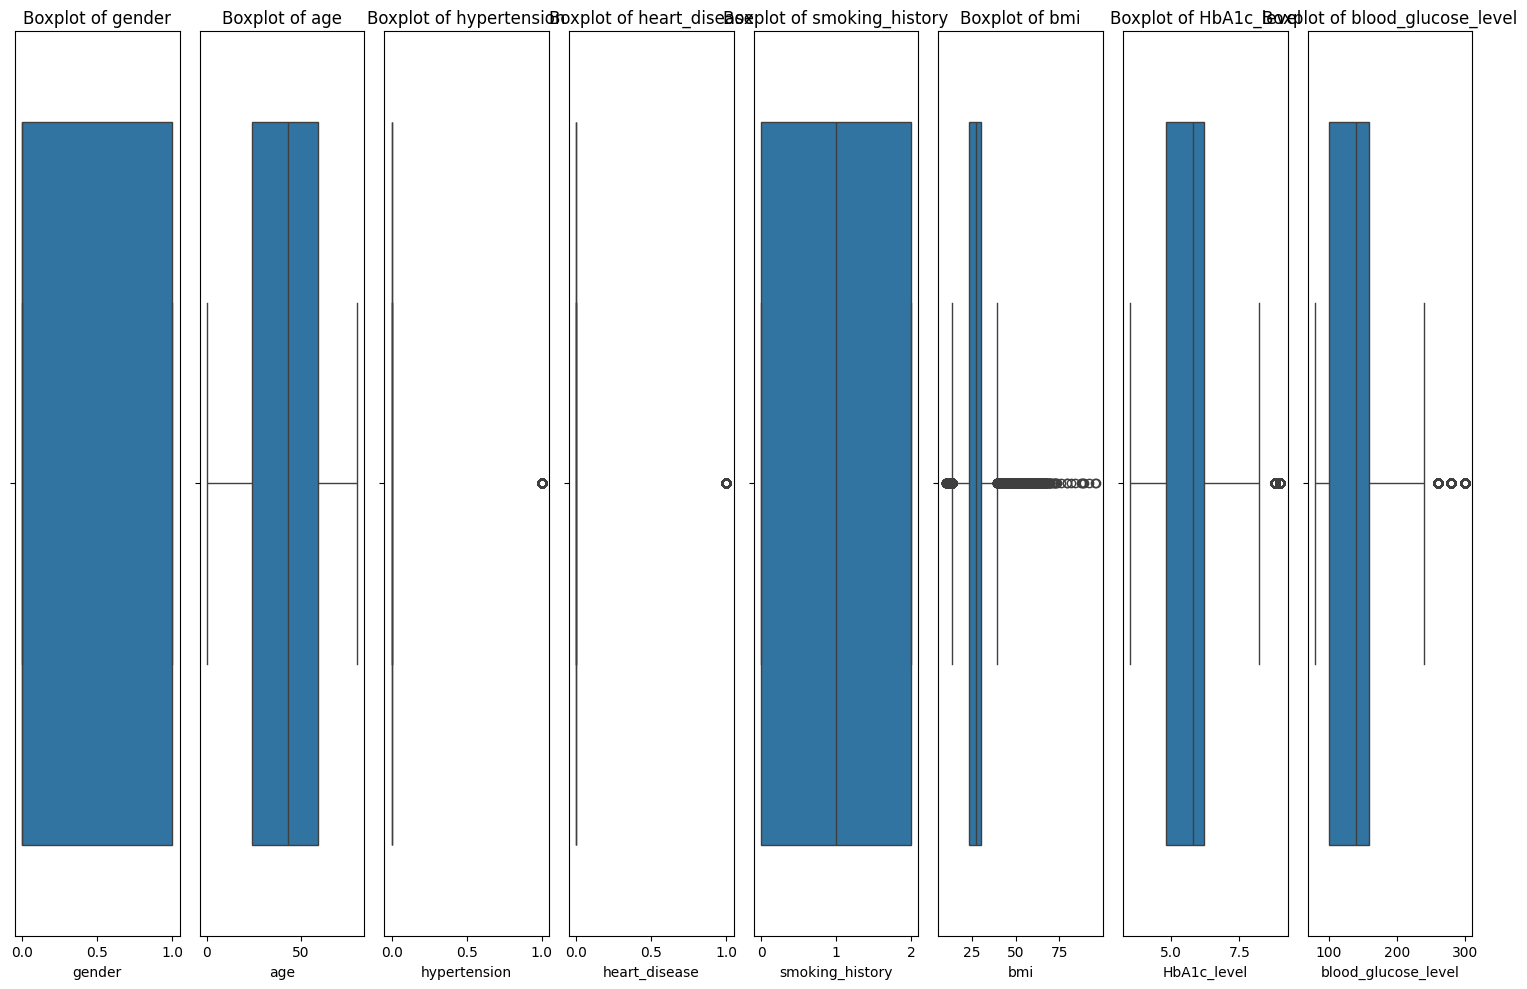

In [26]:
def plot_boxplots(df):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns):
        plt.subplot(1, len(df.columns), i + 1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df.drop('diabetes', axis=1))

## Max Feature
### Max BMI ever recorded is 175 - 204

In [24]:
print("Maximum values of each column:\n", features.max())

Maximum values of each column:
 gender                   1.00
age                     80.00
hypertension             1.00
heart_disease            1.00
smoking_history          2.00
bmi                     95.69
HbA1c_level              9.00
blood_glucose_level    300.00
dtype: float64


# Standarisasi

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('diabetes', axis=1))
X = df_scaled
y = df['diabetes']


# Split data to data test and train

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

# Build Model Neural Network and Evaluation

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1460 - accuracy: 0.9492 - val_loss: 0.1198 - val_accuracy: 0.9565
Epoch 2/50
3365/3365 [==============================] - 7s 2ms/step - loss: 0.1145 - accuracy: 0.9589 - val_loss: 0.1123 - val_accuracy: 0.9617
E

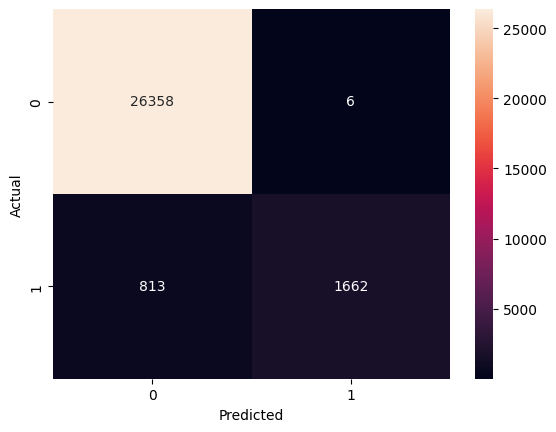

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1470 - accuracy: 0.9497 - val_loss: 0.1229 - val_accuracy: 0.9562
Epoch 2/50


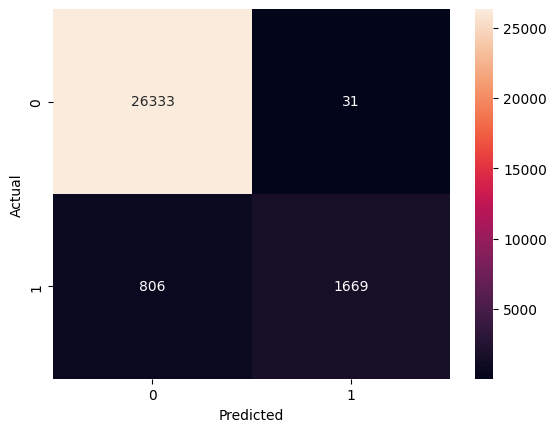

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1397 - accuracy: 0.9511 - val_loss: 0.1196 - val_accuracy: 0.9585
Epoch 2/50
3365/3365 [==============================] - 9s 3ms/step - loss: 0.1170 - accuracy: 0.9592 - val_loss: 0.1158 - val_accuracy: 0.9617

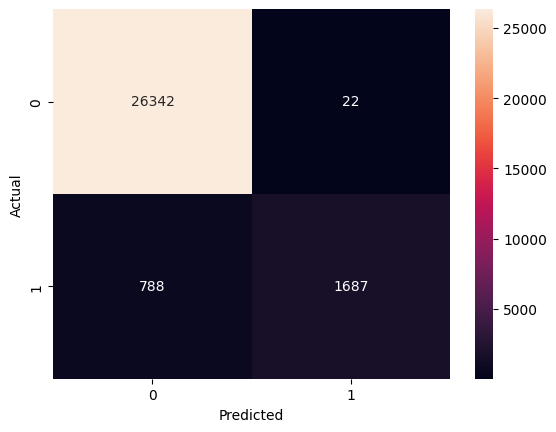

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                144       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1377 - accuracy: 0.9517 - val_loss: 0.1242 - val_accuracy: 0.9545
Epoch 2/50


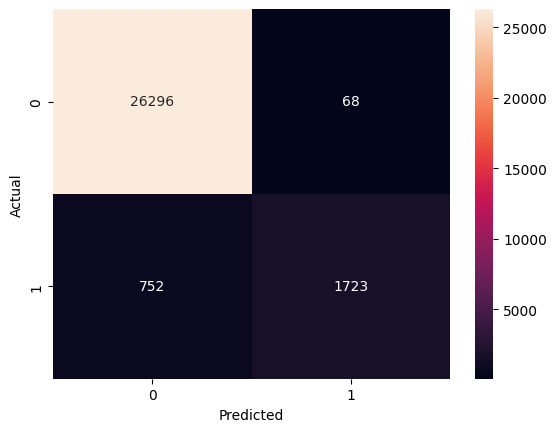

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                144       
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1433 - accuracy: 0.9513 - val_loss: 0.1214 - val_accuracy: 0.9580
Epoch 2/50
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1196 - accuracy: 0.9576 - val_loss: 0.1207 - val_accuracy: 0.959

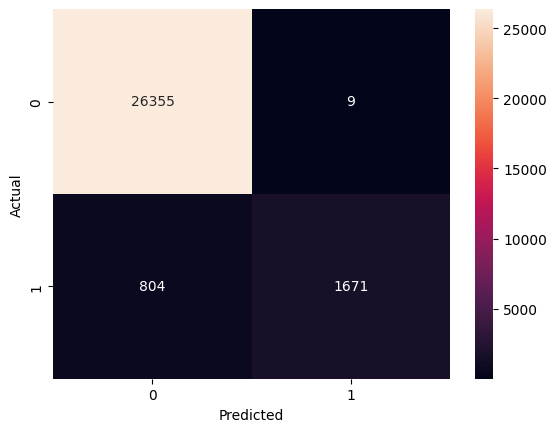

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                144       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 4)                 36        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1479 - accuracy: 0.9511 - val_loss: 0.1138 - val_accuracy: 0.9607
Epoch 2/50


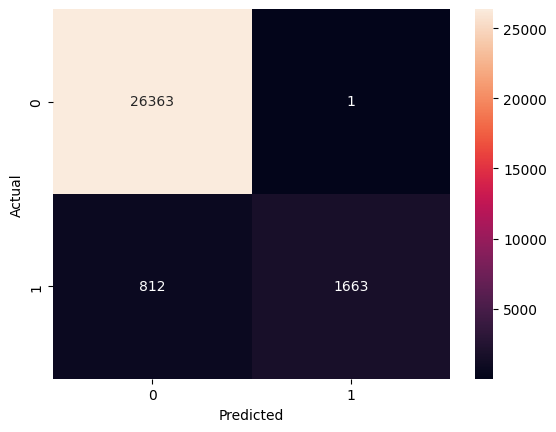

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                144       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1501 - accuracy: 0.9454 - val_loss: 0.1188 - val_accuracy: 0.9594
Epoch 2/50
3365/3365 [==============================] - 9s 3ms/step - loss: 0.1162 - accuracy: 0.9597 - val_loss: 0.1130 - val_accuracy: 0.9620

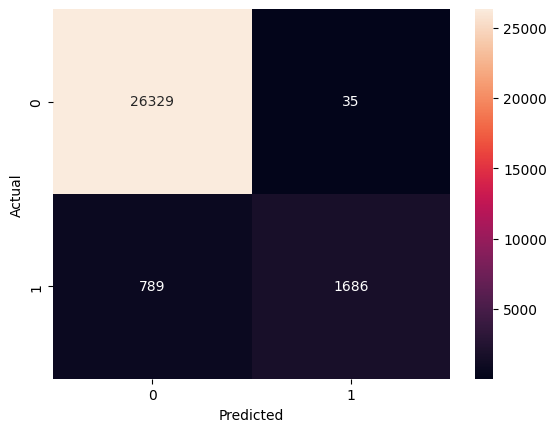

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                144       
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1445 - accuracy: 0.9510 - val_loss: 0.1202 - val_accuracy: 0.9582
Epoch 2/50


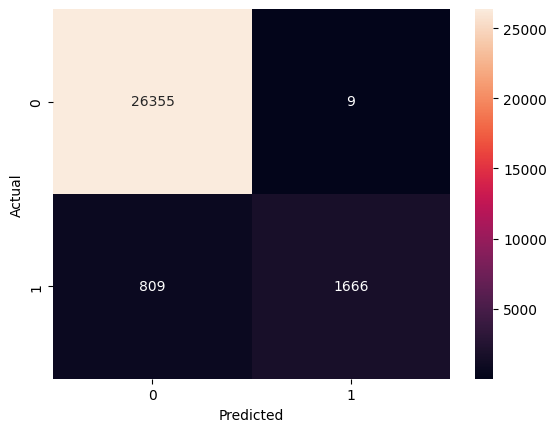

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                144       
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1487 - accuracy: 0.9484 - val_loss: 0.1197 - val_accuracy: 0.9574
Epoch 2/50
3365/3365 [==============================] - 8s 2ms/step - loss: 0.1172 - accuracy: 0.9592 - val_loss: 0.1176 - val_accuracy: 0.9592

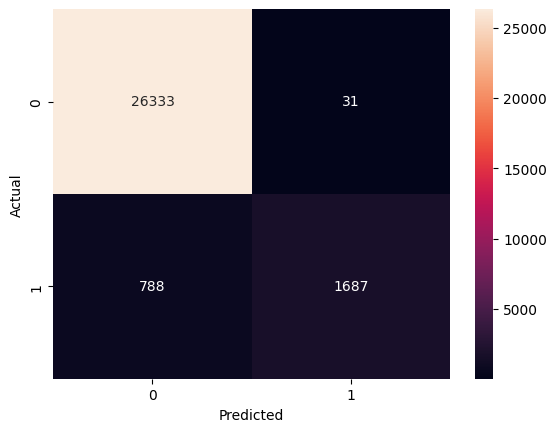

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 16)                144       
                                                                 
 dense_32 (Dense)            (None, 8)                 136       
                                                                 
 dense_33 (Dense)            (None, 4)                 36        
                                                                 
 dense_34 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2052 - accuracy: 0.9521 - val_loss: 0.1348 - val_accuracy: 0.9571
Epoch 2/50


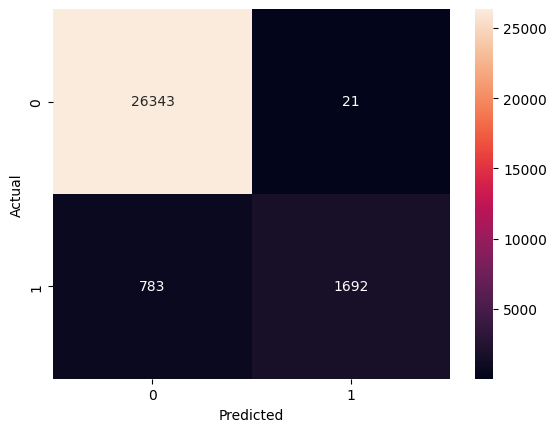

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 16)                144       
                                                                 
 dense_36 (Dense)            (None, 8)                 136       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 9s 2ms/step - loss: 0.1382 - accuracy: 0.9508 - val_loss: 0.1198 - val_accuracy: 0.9575
Epoch 2/50
3365/3365 [==============================] - 9s 3ms/step - loss: 0.1168 - accuracy: 0.9585 - val_loss: 0.1163 - val_accuracy: 0.9585

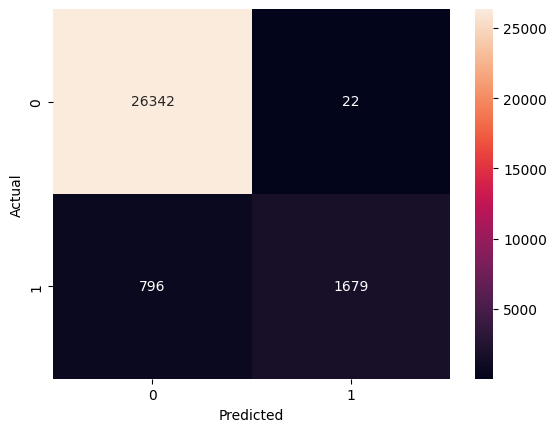

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 16)                144       
                                                                 
 dense_39 (Dense)            (None, 8)                 136       
                                                                 
 dense_40 (Dense)            (None, 4)                 36        
                                                                 
 dense_41 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1443 - accuracy: 0.9494 - val_loss: 0.1155 - val_accuracy: 0.9597
Epoch 2/50

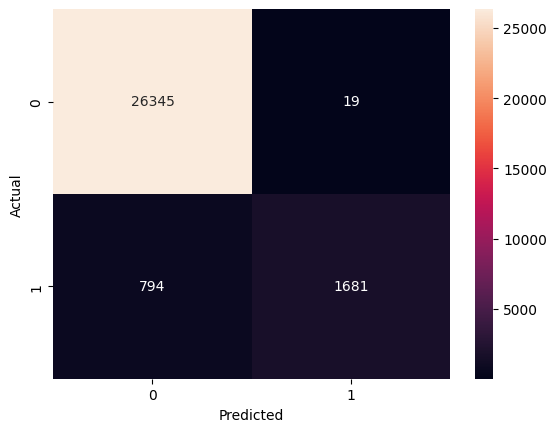

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 16)                144       
                                                                 
 dense_43 (Dense)            (None, 8)                 136       
                                                                 
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1393 - accuracy: 0.9498 - val_loss: 0.1190 - val_accuracy: 0.9600
Epoch 2/50
3365/3365 [==============================] - 9s 3ms/step - loss: 0.1169 - accuracy: 0.9586 - val_loss: 0.1161 - val_accuracy: 0.960

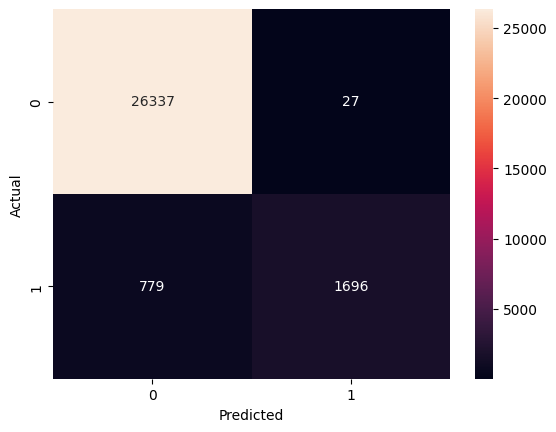

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 16)                144       
                                                                 
 dense_46 (Dense)            (None, 8)                 136       
                                                                 
 dense_47 (Dense)            (None, 4)                 36        
                                                                 
 dense_48 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1447 - accuracy: 0.9497 - val_loss: 0.1179 - val_accuracy: 0.9594
Epoch 2/50

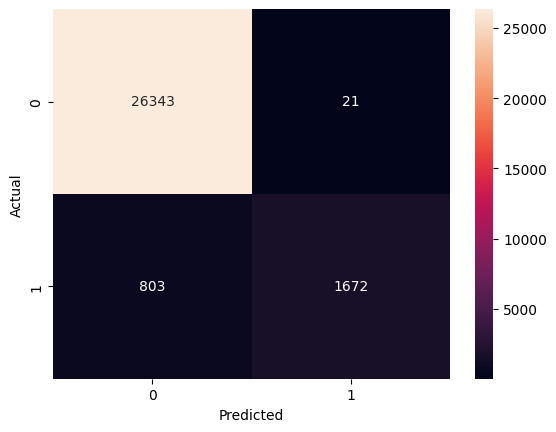

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 64)                576       
                                                                 
 dense_50 (Dense)            (None, 32)                2080      
                                                                 
 dense_51 (Dense)            (None, 16)                528       
                                                                 
 dense_52 (Dense)            (None, 8)                 136       
                                                                 
 dense_53 (Dense)            (None, 4)                 36        
                                                                 
 dense_54 (Dense)            (None, 2)                 10        
                                                                 
 dense_55 (Dense)            (None, 1)               

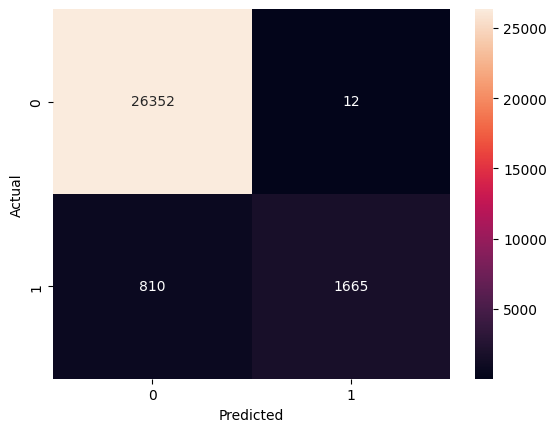

In [18]:
nn_models = {}
nn_configurations = [
    ([16, 8], 'relu'),
    ([16, 8, 4], 'relu'),
    ([16, 8], 'elu'),
    ([16, 8, 4], 'elu'),
    ([16, 8], 'gelu'),
    ([16, 8, 4], 'gelu'),
    ([16, 8], 'relu6'),
    ([16, 8, 4], 'relu6'),
    ([16, 8], 'swish'),
    ([16, 8, 4], 'swish'),
    ([16, 8], 'leaky_relu'),
    ([16, 8, 4], 'leaky_relu'),
    ([16, 8], 'selu'),
    ([16, 8, 4], 'selu'),
    ([64, 32, 16, 8, 4, 2], 'elu'),
]

for i, (layers, activation) in enumerate(nn_configurations, start=1):
    layers_str = '_'.join(map(str, layers))
    activation_name = activation.replace('_', '')
    model_name = f"nn_model_{layers_str}_{activation_name}"
    current_model = build_neural_network(X_train, y_train, layers, activation=activation, model_name=model_name)
    nn_models[model_name] = current_model
    evaluation(current_model, X_test, y_test, is_nn=True)

# Build Model SVM and Evaluation

# Build Model Random Forest and Evaluation